### Contents

01 Import libraries and data

02 Bar charts

03 Histograms and scatterplots

04 Sampling

05 Line chart

### 01 Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [19]:
# Create path

path = r"C:\Users\cathe\OneDrive\Data Analysis\2 4 Instacart Basket Analysis"

In [6]:
# Import data

df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_merge_200225_2.pkl'))

In [7]:
df.shape

(32404161, 23)

In [10]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,av_item_spend,spend_level,median_days_since_prior_order,order_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


### 02 Bar charts

<Axes: xlabel='order_day_of_week'>

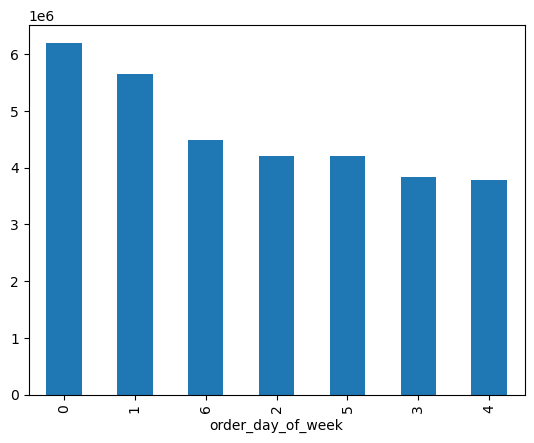

In [13]:
# Bar chart days of the week

df['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

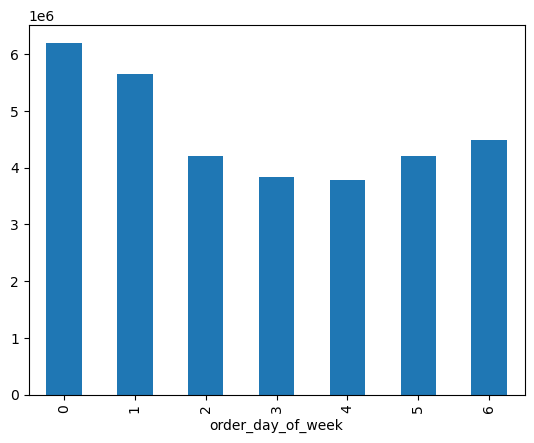

In [15]:
# Bar chart of days of the week, in order

df['order_day_of_week'].value_counts().sort_index().plot.bar()

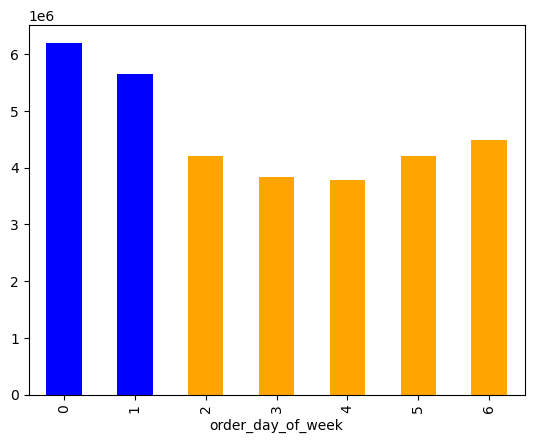

In [23]:
# With colour added

bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange'])

In [27]:
# Export bar chart to Visualisations folder

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

### 03 Histograms and Scatterplots

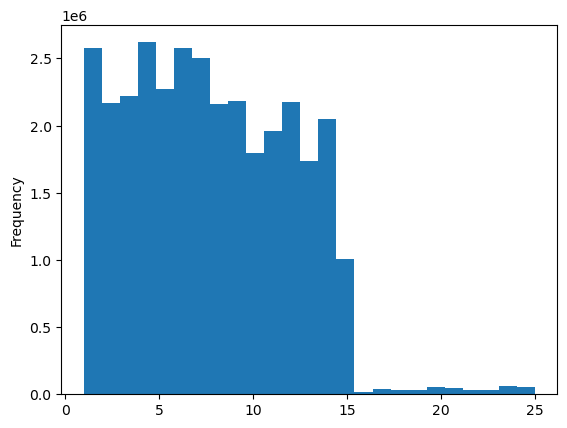

In [35]:
# Histogram of prices

hist = df['prices'].plot.hist(bins = 25)

<Axes: xlabel='order_day_of_week', ylabel='order_hour_of_day'>

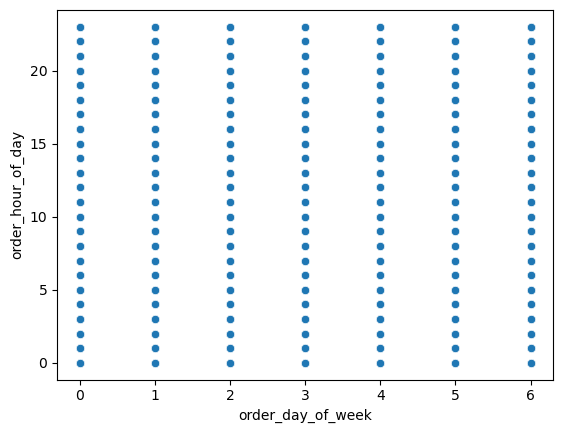

In [32]:
# Scatterplot of day of week against hour of day

sns.scatterplot(x = 'order_day_of_week', y = 'order_hour_of_day', data = df)

Not particularly useful, especially for the length of time it took to plot, since there's no way to identify how many datapoints are represented by each dot on the plot!

However, it does show that every hour of the week, somone is ordering something somewhere!

In [37]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_prices.png'))

### 04 Sampling

In [48]:
# Set up for 70:30 split of dataframe

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [50]:
dev

array([False,  True, False, ...,  True,  True, False])

In [52]:
# Store 70% sample in the dataframe big

big = df[dev]

In [53]:
# Store the 30% sample in the dataframe small

small = df[~dev]

In [62]:
# Check the result

len(big) + len(small) == len(df)

True

In [64]:
# Reduce small sample to only columns needed

df_s = small[['order_day_of_week', 'prices']]

### 05 Line chart

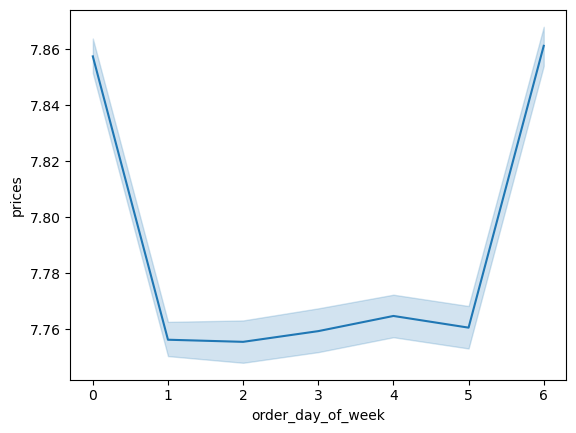

In [66]:
# Create line chart of prices of orders over days of the week

line = sns.lineplot(data = df_s, x = 'order_day_of_week', y = 'prices')

Note: to check how representative the chart is, we could create a similar line chart with the big sample.  (This could take a long time in practice!)

### 06 Export the dataframe

Not needed since no changes made